In [483]:
import pandas as pd
import numpy as np
from tensorflow import keras 
import matplotlib.pyplot as plt

Point Mutation in States of US

In [484]:
df=pd.read_csv("CovidSequenceData.csv")
df

,Dates,ID,Geolocation,A->C,A->T,A->G,C->A,C->T,C->G,T->A,T->C,T->G,G->A,G->C,G->T
0,3/22/2020,MW064453.1,AL,0,0,1,0,7,0,0,0,0,0,0,1
1,3/23/2020,MW064870.1,AL,0,0,1,0,4,0,0,0,0,0,0,1
2,3/23/2020,MW064315.1,AL,0,0,2,0,4,0,0,0,0,0,0,1
3,3/23/2020,MW064314.1,AL,0,0,1,0,4,0,0,0,0,0,0,2
4,4/13/2020,MT820129.1,AL,0,0,1,0,7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168316,4/21/2021,MZ141576.1,WI,0,3,2,3,17,0,1,3,1,2,3,1
168317,4/22/2021,MZ142103.1,WI,0,3,2,3,17,0,1,3,1,2,3,1
168318,4/23/2021,MZ142190.1,WI,1,2,6,3,13,0,1,2,1,2,3,2
168319,4/23/2021,MZ142204.1,WI,1,2,3,4,12,0,1,2,1,3,3,4


In [485]:
abb=pd.read_csv("Acronyms.txt",delimiter="-",names=["Abbrevation","Acronyms"],header=None)
abb

,Abbrevation,Acronyms
0,AL,Alabama
1,AZ,Arizona
2,CA,California
3,CT,Connecticut
4,FL,Florida
5,GA,Georgia
6,MA,Massachusetts
7,MD,Maryland
8,MN,Minnesota
9,NC,North Carolina


In [486]:
df.isna().any()

Dates          False
ID             False
Geolocation    False
A->C           False
A->T           False
A->G           False
C->A           False
C->T           False
C->G           False
T->A           False
T->C           False
T->G           False
G->A           False
G->C           False
G->T           False
dtype: bool

In [487]:
df.isnull().any()

Dates          False
ID             False
Geolocation    False
A->C           False
A->T           False
A->G           False
C->A           False
C->T           False
C->G           False
T->A           False
T->C           False
T->G           False
G->A           False
G->C           False
G->T           False
dtype: bool

In [488]:
df.columns

Index(['Dates', 'ID', 'Geolocation', 'A->C', 'A->T', 'A->G', 'C->A', 'C->T',
       'C->G', 'T->A', 'T->C', 'T->G', 'G->A', 'G->C', 'G->T'],
      dtype='object')

In [489]:
col=["Date","ID","Region","A-C","A-T","A-G","C-A","C-T","C-G","T-A","T-C","T-G","G-A","G-C","G-T"]
df.columns=col
df=df.drop(["ID"],axis=1)
df

,Date,Region,A-C,A-T,A-G,C-A,C-T,C-G,T-A,T-C,T-G,G-A,G-C,G-T
0,3/22/2020,AL,0,0,1,0,7,0,0,0,0,0,0,1
1,3/23/2020,AL,0,0,1,0,4,0,0,0,0,0,0,1
2,3/23/2020,AL,0,0,2,0,4,0,0,0,0,0,0,1
3,3/23/2020,AL,0,0,1,0,4,0,0,0,0,0,0,2
4,4/13/2020,AL,0,0,1,0,7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168316,4/21/2021,WI,0,3,2,3,17,0,1,3,1,2,3,1
168317,4/22/2021,WI,0,3,2,3,17,0,1,3,1,2,3,1
168318,4/23/2021,WI,1,2,6,3,13,0,1,2,1,2,3,2
168319,4/23/2021,WI,1,2,3,4,12,0,1,2,1,3,3,4


In [490]:
a=list(abb["Abbrevation"].values)
Reg=a.copy()
print(a)
for i in range(len(a)):
    a[i]=df.loc[df["Region"]==a[i]]

['AL', 'AZ', 'CA', 'CT', 'FL', 'GA', 'MA', 'MD', 'MN', 'NC', 'NJ', 'NM', 'NY', 'OH', 'PA', 'RI', 'SC', 'TN', 'TX', 'WA', 'WI', 'IL', 'VA']


In [491]:
AL=a[0]
AZ=a[1]
CA =a[2]
CT=a[3]
FL=a[4]
GA=a[5]
MA=a[6]
MD=a[7]
MN=a[8]
NC=a[9]
NJ=a[10]
NM=a[11]
NY=a[12]
OH=a[13]
PA=a[14]
RI=a[15]
SC=a[16]
TN=a[17]
TX=a[18]
WA=a[19]
WI=a[20]
IL=a[21]
VA=a[22]


In [492]:
mean=[]
BP=col[3:]
for i in range(len(BP)):
    print(i,df[BP[i]].values)
    mean.append(np.mean(df[BP[i]].values))
mean

0 [0 0 0 ... 1 1 0]
1 [0 0 0 ... 2 2 2]
2 [1 1 2 ... 6 3 2]
3 [0 0 0 ... 3 4 3]
4 [ 7  4  4 ... 13 12 18]
5 [0 0 0 ... 0 0 0]
6 [0 0 0 ... 1 1 1]
7 [0 0 0 ... 2 2 2]
8 [0 0 0 ... 1 1 1]
9 [0 0 0 ... 2 3 2]
10 [0 0 0 ... 3 3 3]
11 [1 1 1 ... 2 4 1]


[0.20984903844440086,
 1.1102773866600126,
 2.928642296564303,
 1.3204710048062926,
 12.222604428443272,
 0.046833134308850353,
 0.4733990411178641,
 1.741315700358244,
 0.5121404934618972,
 1.7592219627972743,
 1.3312777371807438,
 2.6769684115469845]

In [493]:
mean_matrix=[]
for i in range(len(a)):
    temp=[]
    d=a[i]
    for j in range(len(BP)):
        temp.append(np.mean(d[BP[j]].values))
    mean_matrix.append(temp)
mean_matrix

[[0.11395713538944068,
  0.31102979613173026,
  2.725039205436487,
  0.36016727652901204,
  11.972817564035546,
  0.02561421850496602,
  0.3434396236278097,
  0.8086774699424987,
  0.1620491374803973,
  1.1850496602195504,
  0.4239414532148458,
  3.0888656560376373],
 [0.2071563088512241,
  1.0112994350282485,
  3.054613935969868,
  1.0320150659133709,
  12.648775894538607,
  0.08097928436911488,
  0.4180790960451977,
  1.8258003766478343,
  0.4943502824858757,
  1.4764595103578155,
  1.0197740112994351,
  3.3728813559322033],
 [0.14550853749072012,
  0.7625410966168205,
  2.4482978046452435,
  0.7086647576625305,
  10.554353589988335,
  0.038286138508855656,
  0.26768480220596036,
  1.4649485629441086,
  0.4236928624456464,
  1.2369286244564641,
  0.8059179128221444,
  3.0029695619896066],
 [0.442159383033419,
  0.9813624678663239,
  3.0848329048843186,
  1.1844473007712082,
  12.852185089974293,
  0.031491002570694086,
  0.4222365038560411,
  1.8161953727506426,
  0.5539845758354756,

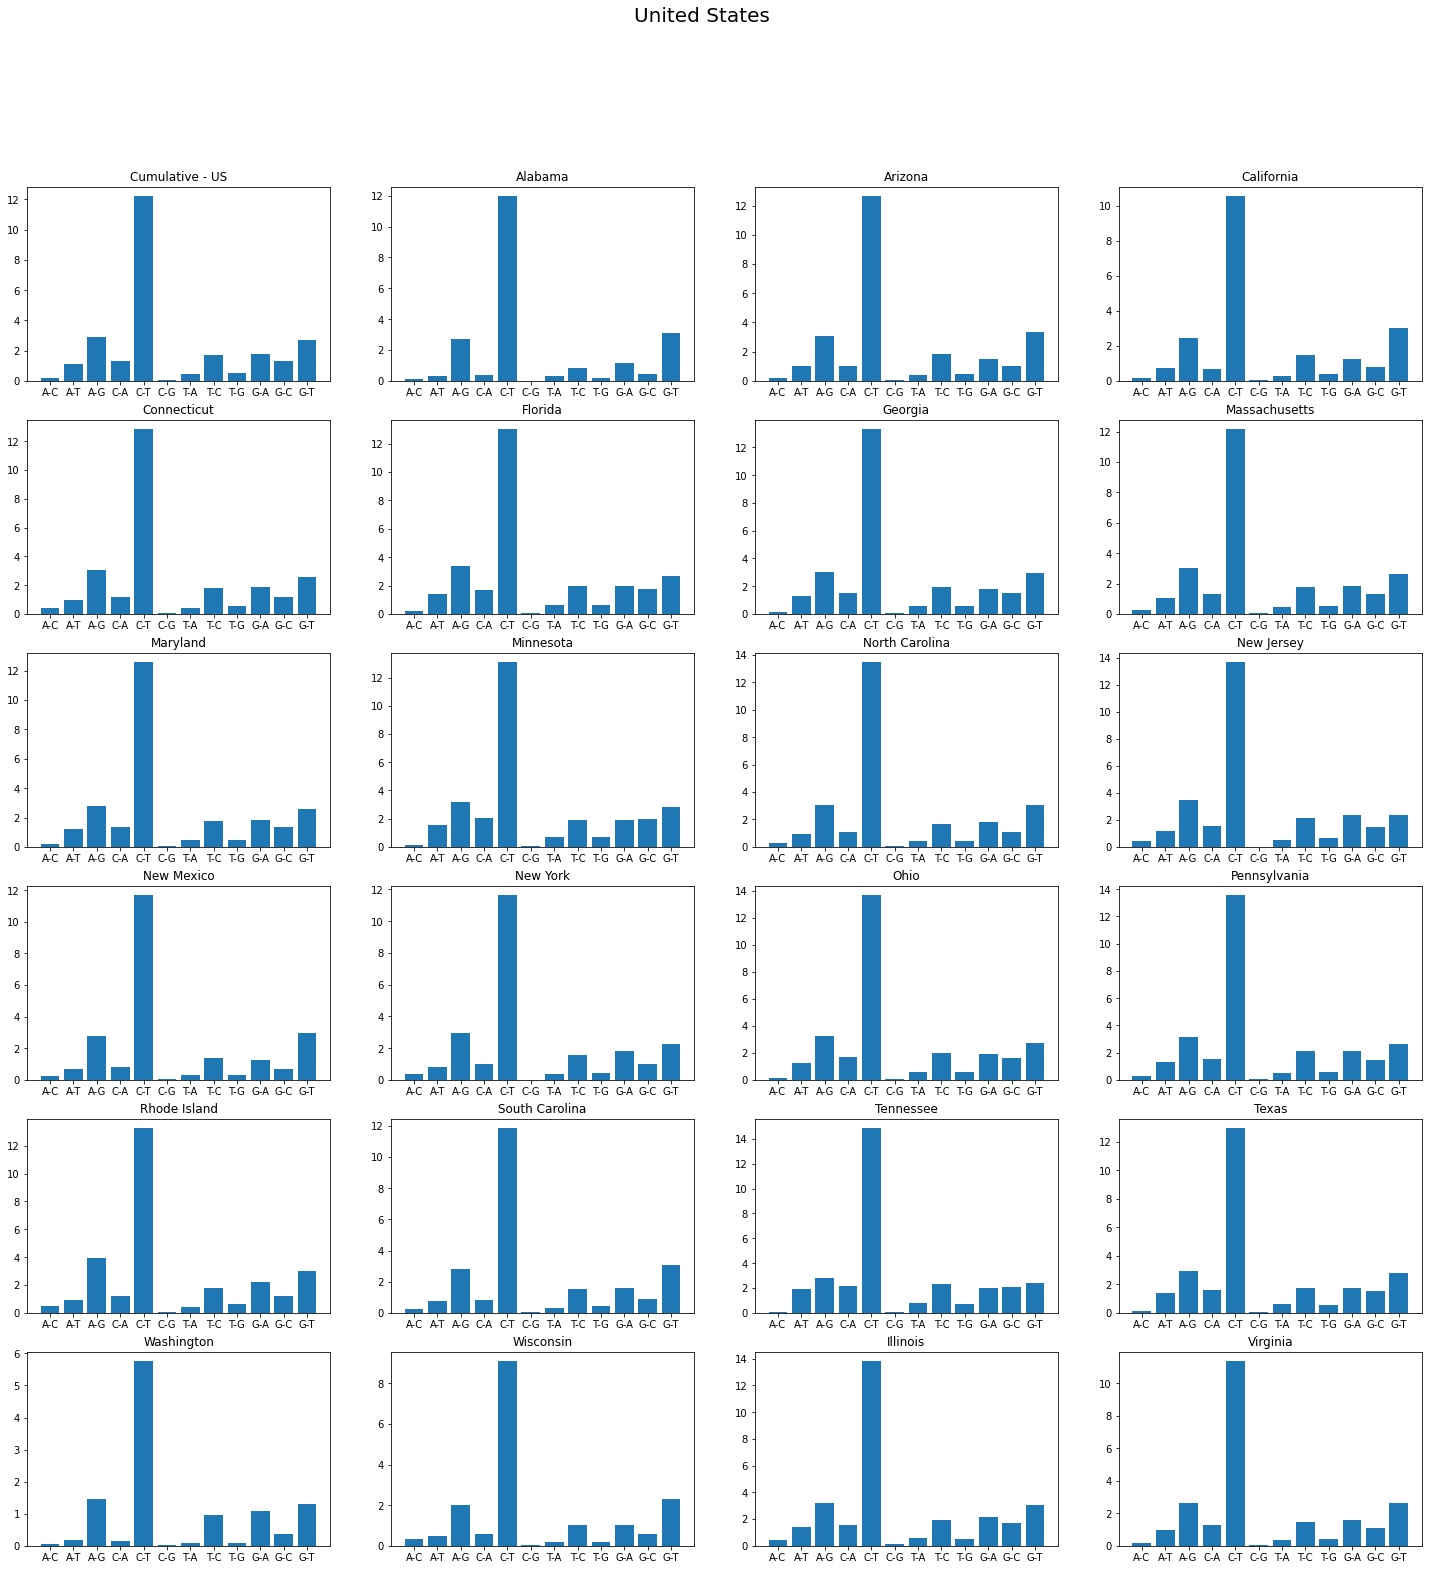

In [494]:
plt.figure(figsize=(25,25))

plt.subplot(6,4,1)
plt.bar(BP,mean)
plt.title("Cumulative - US")

plt.subplot(6,4,2)
plt.bar(BP,mean_matrix[0])
plt.title(abb["Acronyms"][0])

plt.subplot(6,4,3)
plt.bar(BP,mean_matrix[1])
plt.title(abb["Acronyms"][1])

plt.subplot(6,4,4)
plt.bar(BP,mean_matrix[2])
plt.title(abb["Acronyms"][2])

plt.subplot(6,4,5)
plt.bar(BP,mean_matrix[3])
plt.title(abb["Acronyms"][3])

plt.subplot(6,4,6)
plt.bar(BP,mean_matrix[4])
plt.title(abb["Acronyms"][4])

plt.subplot(6,4,7)
plt.bar(BP,mean_matrix[5])
plt.title(abb["Acronyms"][5])

plt.subplot(6,4,8)
plt.bar(BP,mean_matrix[6])
plt.title(abb["Acronyms"][6])

plt.subplot(6,4,9)
plt.bar(BP,mean_matrix[7])
plt.title(abb["Acronyms"][7])

plt.subplot(6,4,10)
plt.bar(BP,mean_matrix[8])
plt.title(abb["Acronyms"][8])

plt.subplot(6,4,11)
plt.bar(BP,mean_matrix[9])
plt.title(abb["Acronyms"][9])

plt.subplot(6,4,12)
plt.bar(BP,mean_matrix[10])
plt.title(abb["Acronyms"][10])

plt.subplot(6,4,13)
plt.bar(BP,mean_matrix[11])
plt.title(abb["Acronyms"][11])

plt.subplot(6,4,14)
plt.bar(BP,mean_matrix[12])
plt.title(abb["Acronyms"][12])

plt.subplot(6,4,15)
plt.bar(BP,mean_matrix[13])
plt.title(abb["Acronyms"][13])

plt.subplot(6,4,16)
plt.bar(BP,mean_matrix[14])
plt.title(abb["Acronyms"][14])

plt.subplot(6,4,17)
plt.bar(BP,mean_matrix[15])
plt.title(abb["Acronyms"][15])

plt.subplot(6,4,18)
plt.bar(BP,mean_matrix[16])
plt.title(abb["Acronyms"][16])

plt.subplot(6,4,19)
plt.bar(BP,mean_matrix[17])
plt.title(abb["Acronyms"][17])

plt.subplot(6,4,20)
plt.bar(BP,mean_matrix[18])
plt.title(abb["Acronyms"][18])

plt.subplot(6,4,21)
plt.bar(BP,mean_matrix[19])
plt.title(abb["Acronyms"][19])

plt.subplot(6,4,22)
plt.bar(BP,mean_matrix[20])
plt.title(abb["Acronyms"][20])

plt.subplot(6,4,23)
plt.bar(BP,mean_matrix[21])
plt.title(abb["Acronyms"][21])

plt.subplot(6,4,24)
plt.bar(BP,mean_matrix[22])
plt.title(abb["Acronyms"][22])

plt.suptitle("United States", fontsize=20)
plt.show()

In [495]:
# Original sequece
seq=pd.read_csv("sequence.fasta",header=None,delimiter= '\n', index_col=False)
RefSeq=""
for i in range(1,len(seq[0])):
    RefSeq+=seq[0][i]
print(RefSeq)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [496]:
RefSeq[70:73]
len(RefSeq)

29903

In [497]:
# Mutattion table
mi=pd.read_csv("MutationIndex.csv")
mi=mi.drop(mi.iloc[:,13:],axis=1)
mi

,Variant,A-C,A-T,A-G,C-A,C-T,C-G,T-A,T-C,T-G,G-A,G-C,G-T
0,alpha,0,0,0,0,6,0,0,1,0,0,0,0
1,beta,0,0,0,0,3,0,0,0,0,0,0,1
2,gamma,0,1,2,0,5,0,0,1,0,0,1,0
3,delta1,0,0,0,0,2,0,0,0,0,0,0,2
4,delta2,0,0,1,0,3,0,0,0,0,0,0,2
5,delta3,0,0,0,0,2,0,0,0,0,0,0,2
6,omicron,1,1,0,0,6,0,0,1,1,0,0,0
7,lamda,0,1,0,0,6,0,0,0,0,0,0,0
8,mu,0,3,0,0,5,0,0,0,0,0,0,0


In [498]:
df

,Date,Region,A-C,A-T,A-G,C-A,C-T,C-G,T-A,T-C,T-G,G-A,G-C,G-T
0,3/22/2020,AL,0,0,1,0,7,0,0,0,0,0,0,1
1,3/23/2020,AL,0,0,1,0,4,0,0,0,0,0,0,1
2,3/23/2020,AL,0,0,2,0,4,0,0,0,0,0,0,1
3,3/23/2020,AL,0,0,1,0,4,0,0,0,0,0,0,2
4,4/13/2020,AL,0,0,1,0,7,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168316,4/21/2021,WI,0,3,2,3,17,0,1,3,1,2,3,1
168317,4/22/2021,WI,0,3,2,3,17,0,1,3,1,2,3,1
168318,4/23/2021,WI,1,2,6,3,13,0,1,2,1,2,3,2
168319,4/23/2021,WI,1,2,3,4,12,0,1,2,1,3,3,4
